<a href="https://colab.research.google.com/github/ashsotoo/Sales-Predictions/blob/main/SALES_DATA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SALES DATA

## LOADING DATA

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sales_predictions.csv')
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## DATA CLEANING

In [6]:
df.drop(columns= ['Item_Visibility', 'Item_Weight', 'Outlet_Establishment_Year', 'Outlet_Type', 'Outlet_Size'], inplace=True)

In [7]:
df.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Location_Type,Item_Outlet_Sales
0,FDA15,Low Fat,Dairy,249.8092,OUT049,Tier 1,3735.1380
1,DRC01,Regular,Soft Drinks,48.2692,OUT018,Tier 3,443.4228
2,FDN15,Low Fat,Meat,141.6180,OUT049,Tier 1,2097.2700
3,FDX07,Regular,Fruits and Vegetables,182.0950,OUT010,Tier 3,732.3800
4,NCD19,Low Fat,Household,53.8614,OUT013,Tier 3,994.7052


In [8]:
df.duplicated().sum()

0

In [9]:
data_types = df.dtypes
data_types

Item_Identifier          object
Item_Fat_Content         object
Item_Type                object
Item_MRP                float64
Outlet_Identifier        object
Outlet_Location_Type     object
Item_Outlet_Sales       float64
dtype: object

In [10]:
str_cols = data_types [ data_types == 'object']
str_cols

Item_Identifier         object
Item_Fat_Content        object
Item_Type               object
Outlet_Identifier       object
Outlet_Location_Type    object
dtype: object

In [11]:
str_cols.index

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Location_Type'],
      dtype='object')

In [12]:
df.isna().sum()

Item_Identifier         0
Item_Fat_Content        0
Item_Type               0
Item_MRP                0
Outlet_Identifier       0
Outlet_Location_Type    0
Item_Outlet_Sales       0
dtype: int64

In [13]:
null_values = df.isna().sum()
null_values[null_values>0]

Series([], dtype: int64)

In [14]:
df

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Location_Type,Item_Outlet_Sales
0,FDA15,Low Fat,Dairy,249.8092,OUT049,Tier 1,3735.1380
1,DRC01,Regular,Soft Drinks,48.2692,OUT018,Tier 3,443.4228
2,FDN15,Low Fat,Meat,141.6180,OUT049,Tier 1,2097.2700
3,FDX07,Regular,Fruits and Vegetables,182.0950,OUT010,Tier 3,732.3800
4,NCD19,Low Fat,Household,53.8614,OUT013,Tier 3,994.7052
...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,Snack Foods,214.5218,OUT013,Tier 3,2778.3834
8519,FDS36,Regular,Baking Goods,108.1570,OUT045,Tier 2,549.2850
8520,NCJ29,Low Fat,Health and Hygiene,85.1224,OUT035,Tier 2,1193.1136
8521,FDN46,Regular,Snack Foods,103.1332,OUT018,Tier 3,1845.5976


## EXPLORATORY VISUALS

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

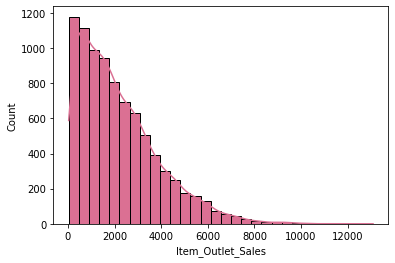

In [38]:
sns.histplot(data = df, x = 'Item_Outlet_Sales', color = 'palevioletred', alpha = 1, bins = 30, kde=True);

Item Outlet Sales are left skewed. 

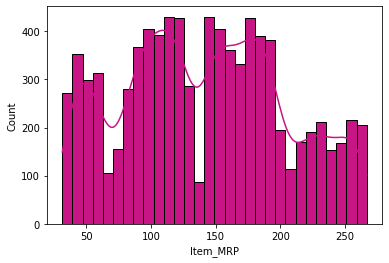

In [36]:
sns.histplot(data = df, x = 'Item_MRP', color = 'mediumvioletred', alpha = 1, bins = 30, kde=True); 

Data of Item_MRP is multimodal.

{'whiskers': [<matplotlib.lines.Line2D at 0x7f2d7371a950>,
 'caps': [<matplotlib.lines.Line2D at 0x7f2d736f6410>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f2d7371a3d0>,
 'medians': [<matplotlib.lines.Line2D at 0x7f2d736f6ed0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f2d736dfc10>,
 'means': []}

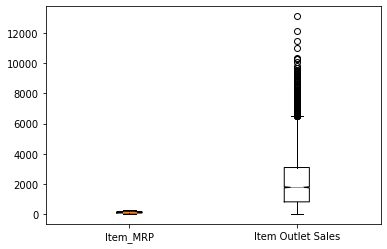

In [43]:
mrp = df['Item_MRP']
sales = df['Item_Outlet_Sales']
plt.boxplot([mrp,sales], labels=['Item_MRP', 'Item Outlet Sales'], notch=True)


In [45]:
correlation = df['Item_MRP'].corr(df['Item_Outlet_Sales'])
correlation

0.5675744466569194

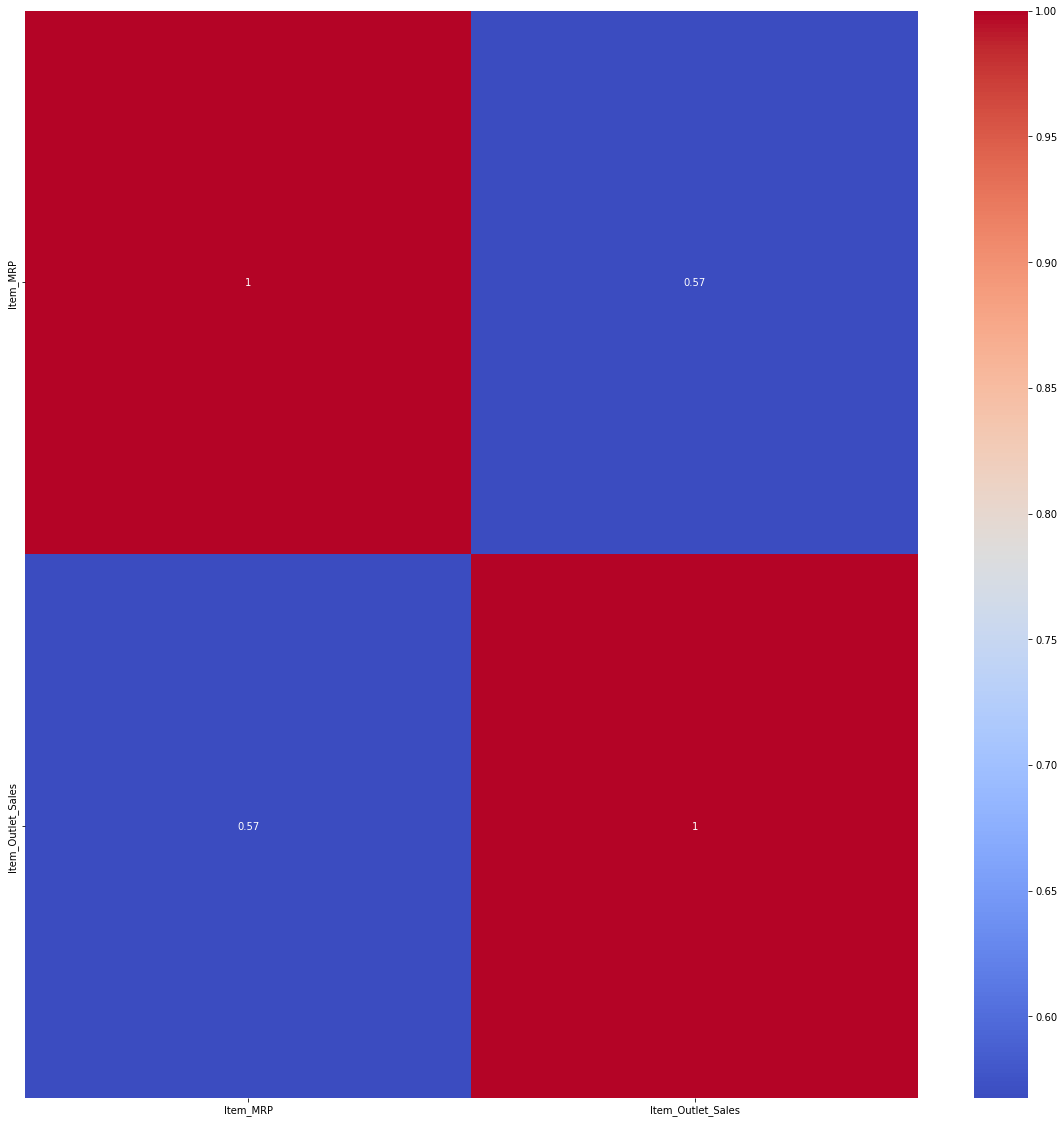

In [48]:
corr = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, cmap= 'coolwarm', annot=True)

## EXPLANATORY DATA